# 01. Analysis Seoul CCTV

In [1]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 1. 데이터 읽기

In [2]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding='utf-8')

In [3]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '구별'}, inplace=True)

In [6]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [7]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols='B, D, G, J, N'
)

In [8]:
pop_Seoul.tail()

,자치구,계,계.1,계.2,65세이상고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [9]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: '구별',
        pop_Seoul.columns[1]: '인구수',
        pop_Seoul.columns[2]: '한국인',
        pop_Seoul.columns[3]: '외국인',
        pop_Seoul.columns[4]: '고령자',
    },
    inplace=True,
)

pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


## 2. Pandas 기초
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받으들여도 됨
- "스테로이드 맞은 엑셀"

### Series
- index와 value로 이루어져 있다.
- 한 가지 데이터 타입만 가질 수 있다.

In [10]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

### 날짜 데이터

In [11]:
dates = pd.date_range("20210101", periods=6)

### DataFrame
- Series : index, data
- DataFrame : index, column, data

In [12]:
data = np.random.randn(6, 4)

In [13]:
df = pd.DataFrame(data, index=dates, columns=list('ABCD'))

### DataFrame 정보 탐색

In [14]:
print(df.index)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.218777,0.041258,0.582015,-0.349734
std,0.702326,1.421511,0.299523,1.534742
min,-1.275141,-2.205743,0.181040,-2.242273
25%,-0.493195,-0.720002,0.352130,-1.521509
50%,-0.281770,0.375964,0.664804,-0.360696
75%,0.186168,0.938076,0.752603,0.723670
max,0.747543,1.661239,0.951669,1.688586


### Data sort
- sort_values()
- 특정 column을 기준으로 정렬

In [17]:
df.sort_values(by="B", ascending=False, inplace=True)

In [18]:
df

,A,B,C,D
2021-01-06,-0.546781,1.661239,0.951669,0.096317
2021-01-02,0.747543,1.031918,0.757647,-0.817710
2021-01-04,0.325258,0.656551,0.592140,1.688586
2021-01-05,-0.332439,0.095377,0.737468,0.932787
2021-01-01,-1.275141,-0.991795,0.272126,-1.756109
2021-01-03,-0.231100,-2.205743,0.181040,-2.242273


### 데이터 선택, slicing
- loc
- iloc

### condition
- NaN : Not a Number

In [19]:
df[df['A'] > 0]

,A,B,C,D
2021-01-02,0.747543,1.031918,0.757647,-0.817710
2021-01-04,0.325258,0.656551,0.592140,1.688586


### Column 추가
- 기존 컬럼이 없으면 추가
- 기존 컬럼이 있으면 수정

In [20]:
df["E"] = list(range(1, 7))
df

,A,B,C,D,E
2021-01-06,-0.546781,1.661239,0.951669,0.096317,1
2021-01-02,0.747543,1.031918,0.757647,-0.817710,2
2021-01-04,0.325258,0.656551,0.592140,1.688586,3
2021-01-05,-0.332439,0.095377,0.737468,0.932787,4
2021-01-01,-1.275141,-0.991795,0.272126,-1.756109,5
2021-01-03,-0.231100,-2.205743,0.181040,-2.242273,6


### 특정 컬럼 제거
- del
- drop

In [21]:
del df["E"]
df

,A,B,C,D
2021-01-06,-0.546781,1.661239,0.951669,0.096317
2021-01-02,0.747543,1.031918,0.757647,-0.817710
2021-01-04,0.325258,0.656551,0.592140,1.688586
2021-01-05,-0.332439,0.095377,0.737468,0.932787
2021-01-01,-1.275141,-0.991795,0.272126,-1.756109
2021-01-03,-0.231100,-2.205743,0.181040,-2.242273


In [22]:
df.drop("D", axis=1, inplace=True)

### apply

In [23]:
df

,A,B,C
2021-01-06,-0.546781,1.661239,0.951669
2021-01-02,0.747543,1.031918,0.757647
2021-01-04,0.325258,0.656551,0.592140
2021-01-05,-0.332439,0.095377,0.737468
2021-01-01,-1.275141,-0.991795,0.272126
2021-01-03,-0.231100,-2.205743,0.181040


In [24]:
df["A"].apply("sum"), df["A"].apply("mean")

(-1.3126595833182841, -0.21877659721971401)

---

# 2.CCTV 데이터 훑어보기

In [25]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [26]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [27]:
# 기존 컬럼이 없으면 추가, 있으면 수정
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"]+CCTV_Seoul["2015년"]+CCTV_Seoul["2014년"])
    / CCTV_Seoul["2013년도 이전"] * 100
)

In [28]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


# 인구현황 데이터 훑어보기

In [29]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [30]:
pop_Seoul.drop([0], axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [31]:
pop_Seoul["구별"].unique(), len(pop_Seoul["구별"].unique())

(array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
        '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
        '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object),
 25)

# 4. 두 데이터 합치기

#### Pandas DF 병합
- concat
- `merge`
- join

In [32]:
# 딕셔너리 안에 리스트 형태
left = pd.DataFrame({
    "key": ["K0", "K4", "K2", "K3"],
    "A": ["K0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"]
})

In [33]:
right = pd.DataFrame([
    {"key": "K0", "C": "C0", "D": "D0"},
    {"key": "K1", "C": "C1", "D": "D1"},
    {"key": "K2", "C": "C2", "D": "D2"},
    {"key": "K3", "C": "C3", "D": "D3"},

])

#### pd.merge()
- 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준 : 키값, 피벗

In [34]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,K0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [35]:
pd.merge(left, right, on='key', how='left')

,key,A,B,C,D
0,K0,K0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [36]:
pd.merge(left, right, on='key', how='outer')

,key,A,B,C,D
0,K0,K0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [37]:
pop_Seoul.columns, CCTV_Seoul.columns

(Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object'),
 Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율'], dtype='object'))

In [38]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자
20,용산구,2096,1368,218,112,398,53.216374,244444,229161,15283,36882
21,은평구,2108,1138,224,278,468,85.237258,491202,486794,4408,74559
22,종로구,1619,464,314,211,630,248.922414,164257,154770,9487,26182
23,중구,1023,413,190,72,348,147.699758,134593,125709,8884,21384
24,중랑구,916,509,121,177,109,79.960707,412780,408226,4554,59262


### 컬럼 드랍

In [39]:
del data_result["2013년도 이전"]

In [40]:
data_result.drop(["2014년", "2015년", "2016년"], axis=1, inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자
0,강남구,3238,150.619195,561052,556164,4888,65060
1,강동구,1010,166.490765,440359,436223,4136,56161
2,강북구,831,125.203252,328002,324479,3523,56530
3,강서구,911,134.793814,608255,601691,6564,76032
4,관악구,2109,149.290780,520929,503297,17632,70046


### 인덱스변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [41]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자
구별,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060
강동구,1010,166.490765,440359,436223,4136,56161
강북구,831,125.203252,328002,324479,3523,56530
강서구,911,134.793814,608255,601691,6564,76032
관악구,2109,149.290780,520929,503297,17632,70046


### 상관계수
- corr()
- 상관계수가 0.2이상인 데이터를 비교

In [42]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000


In [43]:
data_result.info()  # object타입이 없었기에 모든 corr 계산 가능했던 것

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.4+ KB


In [44]:
data_result['CCTV비율'] = data_result["소계"] / data_result["인구수"] * 100

In [45]:
data_result.tail()

,소계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
용산구,2096,53.216374,244444,229161,15283,36882,0.857456
은평구,2108,85.237258,491202,486794,4408,74559,0.429151
종로구,1619,248.922414,164257,154770,9487,26182,0.985651
중구,1023,147.699758,134593,125709,8884,21384,0.760069
중랑구,916,79.960707,412780,408226,4554,59262,0.221910


In [46]:
data_result.sort_values(by='CCTV비율', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,0.857456
중구,1023,147.699758,134593,125709,8884,21384,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,0.531774


---

# matplotlib 기초

In [47]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

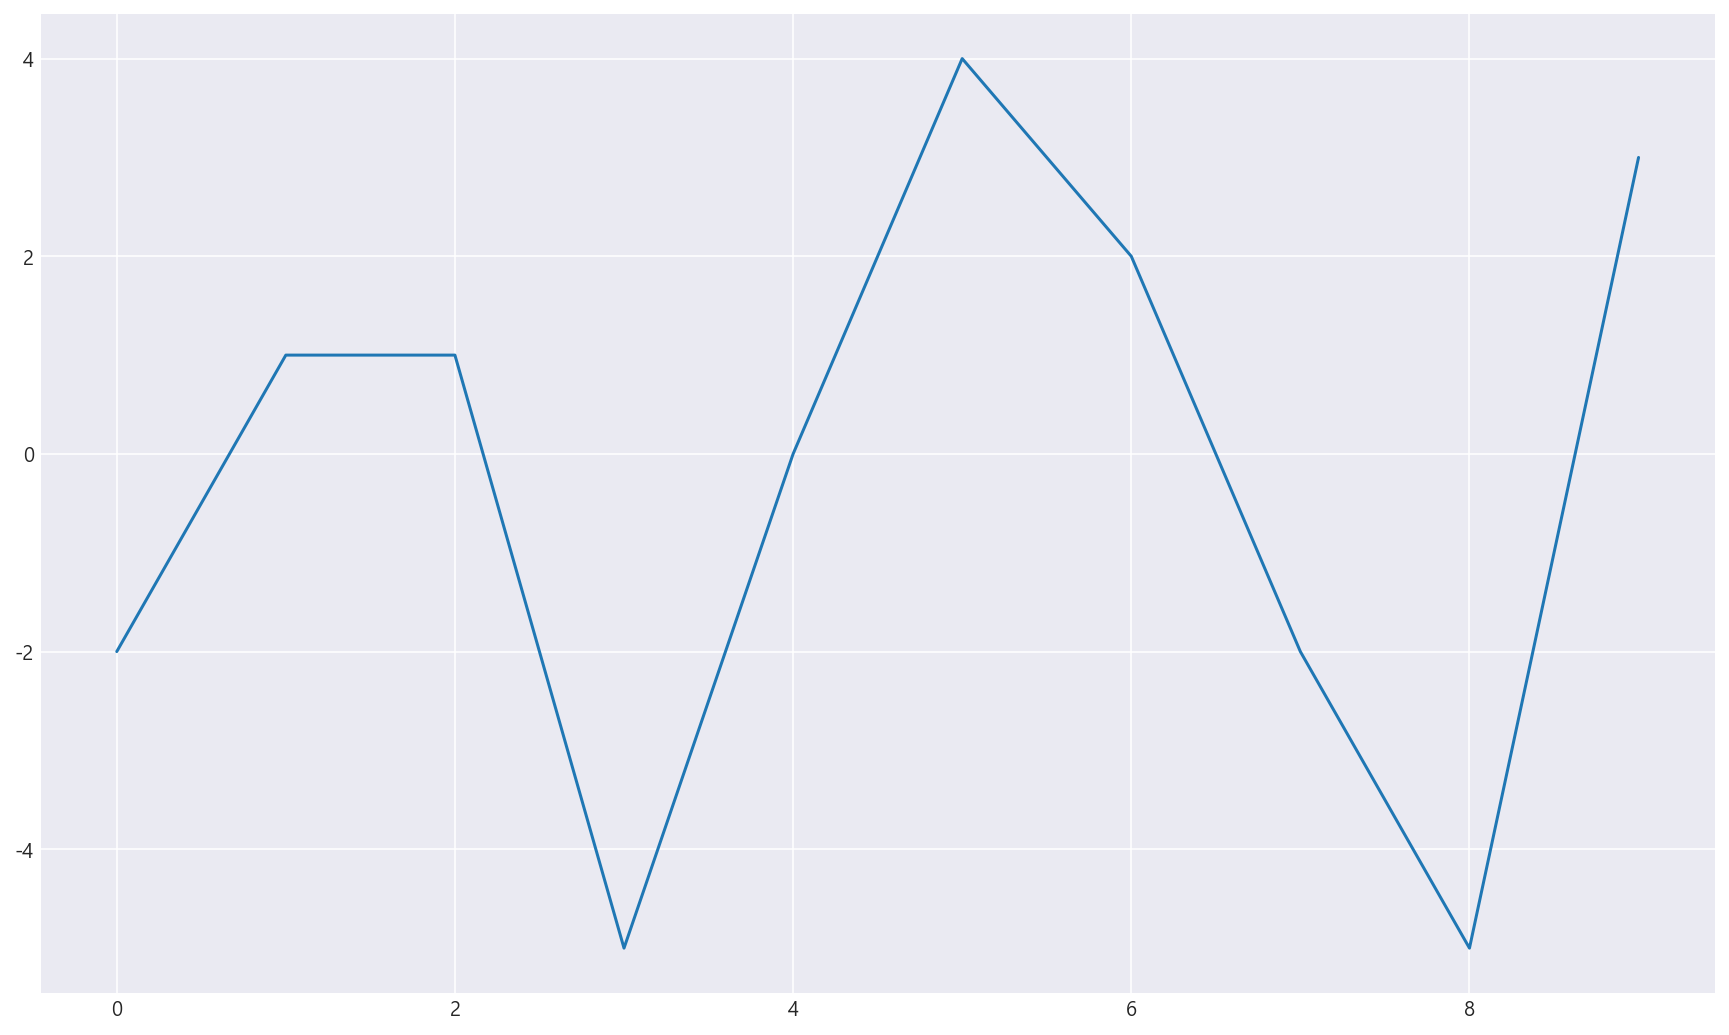

In [48]:
plt.figure(figsize=(15, 9))
plt.plot(list(range(0, 10)), np.random.randint(-5, 5, size=10))
plt.show()

### 예제1: 그래프 기초

#### 삼각함수 그리기
- np.arange(a,b,s)
- np.sin(value)

In [49]:
t = np.arange(0, np.pi*4, 0.01)
y = np.sin(t)

In [50]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t))
    plt.plot(t, np.cos(t))
    plt.grid(True)
    plt.xlabel("0부터 12까지")
    plt.ylabel("sin / cos")
    plt.title("Example of sinewave")
    plt.legend(labels=["sin", "cos"], loc="upper right")
    plt.show()

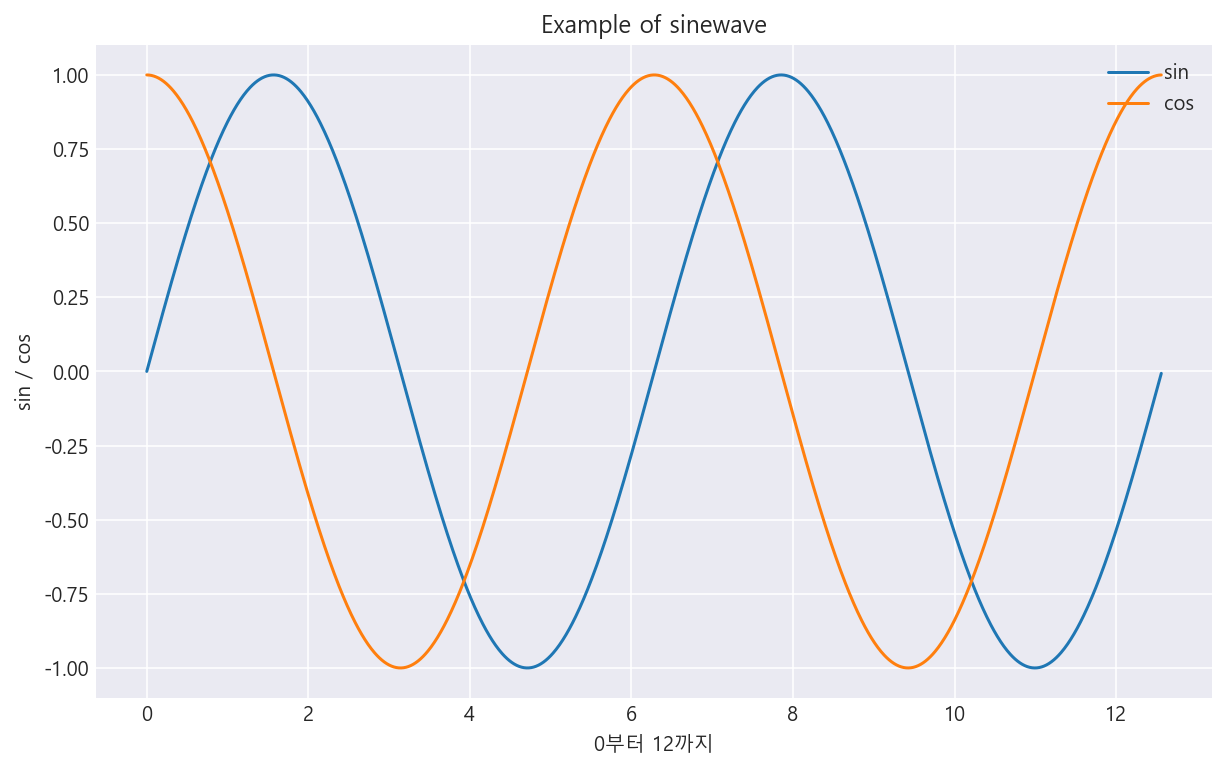

In [51]:
drawGraph()

### 예제2: 그래프 커스텀

In [52]:
t = np.arange(0, 5, 0.5)

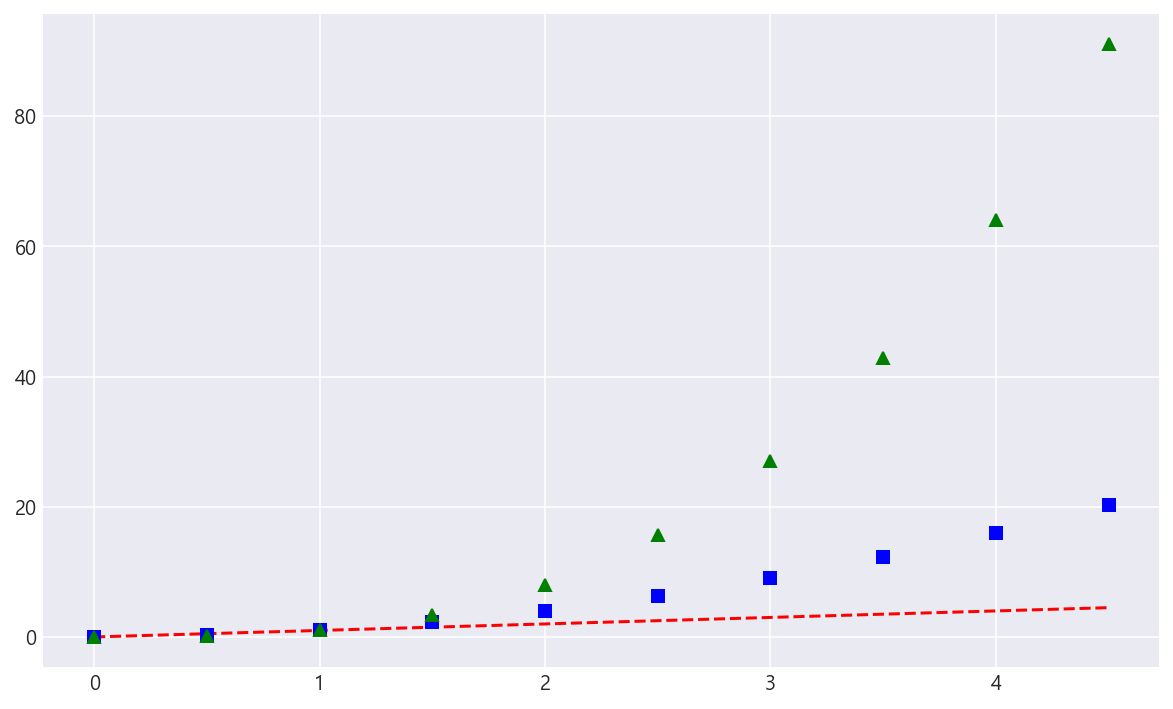

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--")
plt.plot(t, t**2, "bs")
plt.plot(t, t**3, "g^")
plt.show()

In [54]:
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 6, 3]

In [55]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        y,
        color="green",
        linestyle="-.",
        marker="o",
        markerfacecolor="blue",
        markersize=15,
    )

    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()

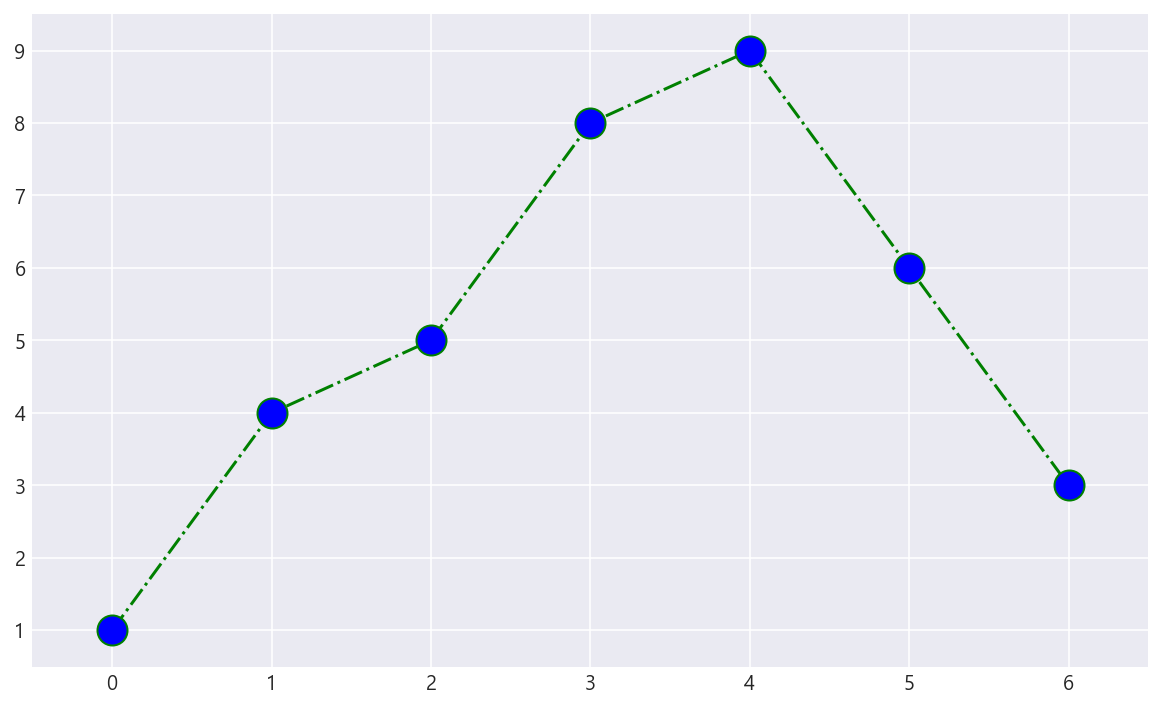

In [56]:
drawGraph()

### 예제3 : scatter plot

In [57]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

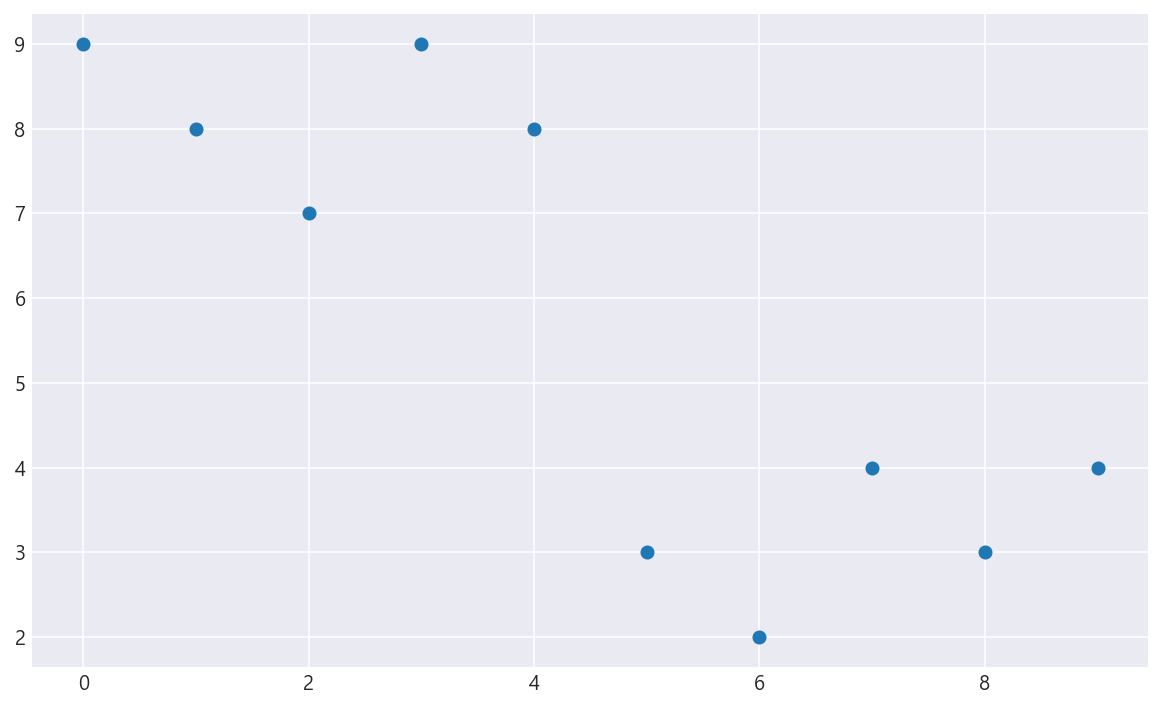

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(t, y)
plt.show()

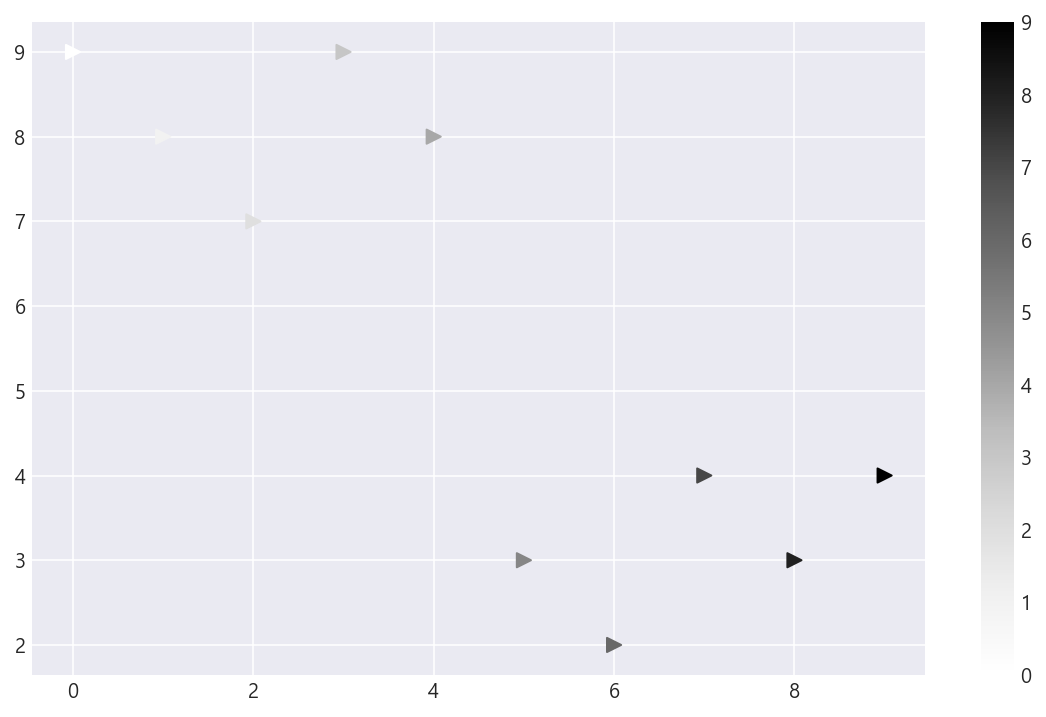

In [59]:
colormap = t


def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s=50, c=colormap, marker=">")
    plt.colorbar()
    plt.show()


drawGraph()

### 예제 : Pandas에서 plot 그리기
- matplotlib을 가져와서 사용합니다

In [60]:
data_result.tail()

,소계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
용산구,2096,53.216374,244444,229161,15283,36882,0.857456
은평구,2108,85.237258,491202,486794,4408,74559,0.429151
종로구,1619,248.922414,164257,154770,9487,26182,0.985651
중구,1023,147.699758,134593,125709,8884,21384,0.760069
중랑구,916,79.960707,412780,408226,4554,59262,0.221910


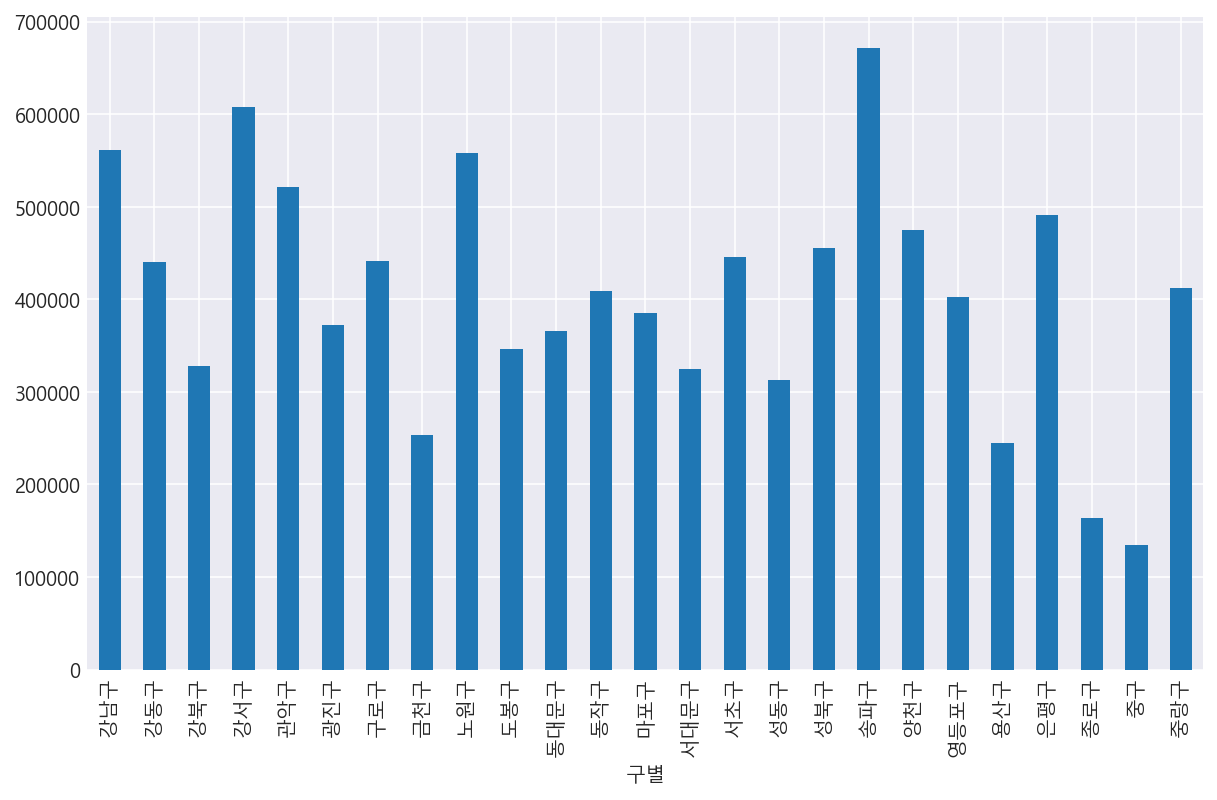

In [61]:
data_result["인구수"].plot(kind = "bar",figsize=(10,6));

---

In [62]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.229358
강북구,831,125.203252,328002,324479,3523,56530,0.253352
강서구,911,134.793814,608255,601691,6564,76032,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,0.404854


### 소계 컬럼 시각화

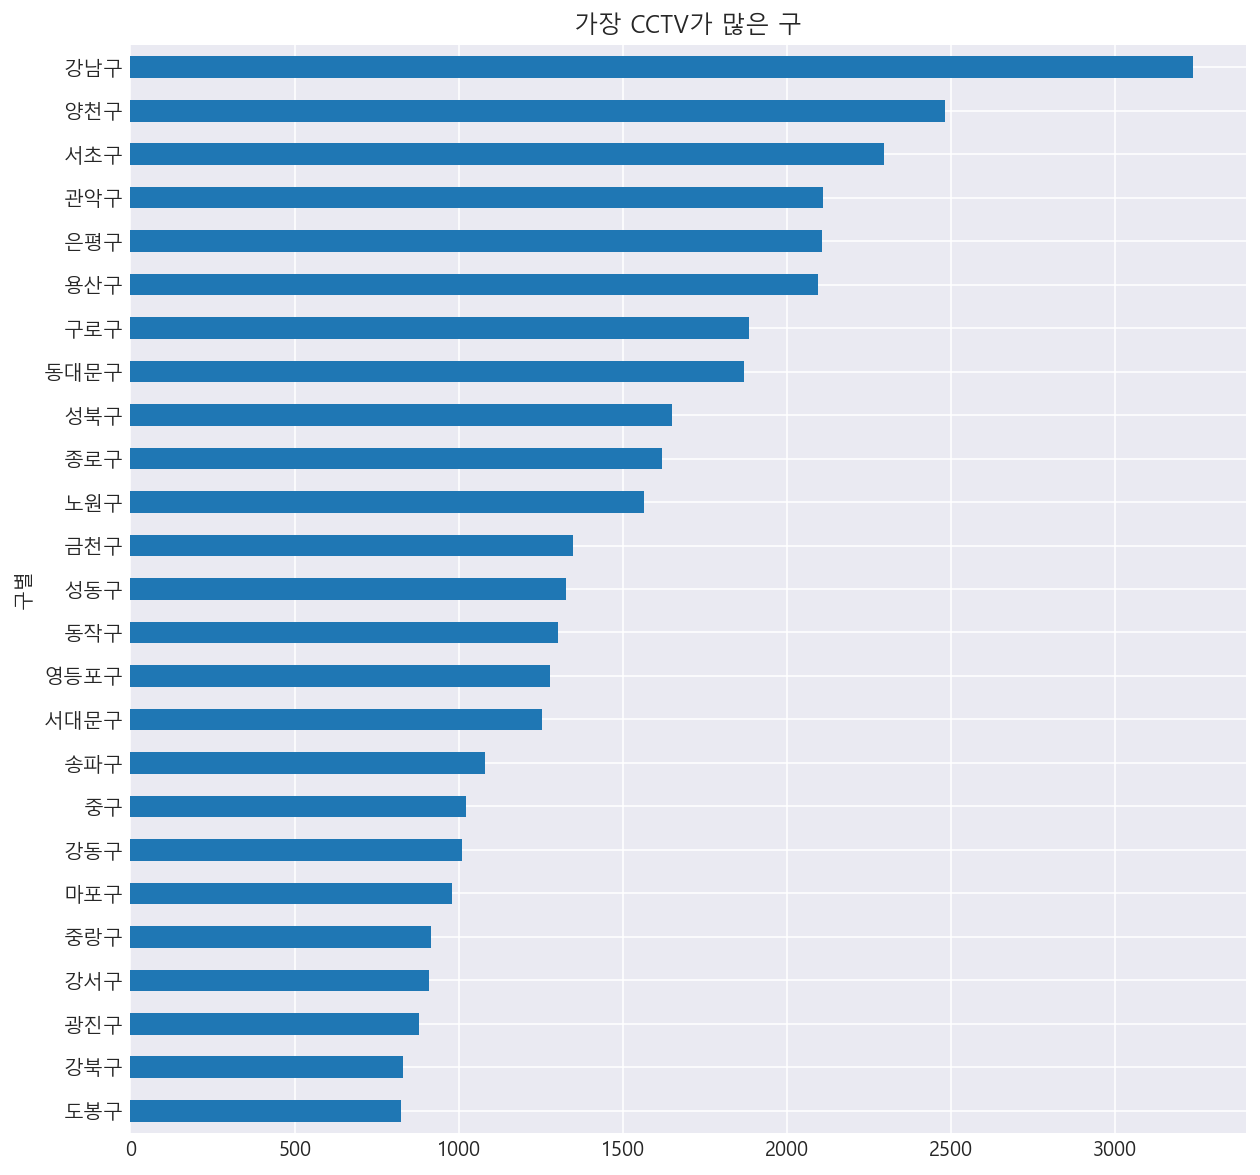

In [63]:
data_result["소계"].sort_values().plot(
    kind="barh",
    figsize=(10, 10),
    title = "가장 CCTV가 많은 구"
);

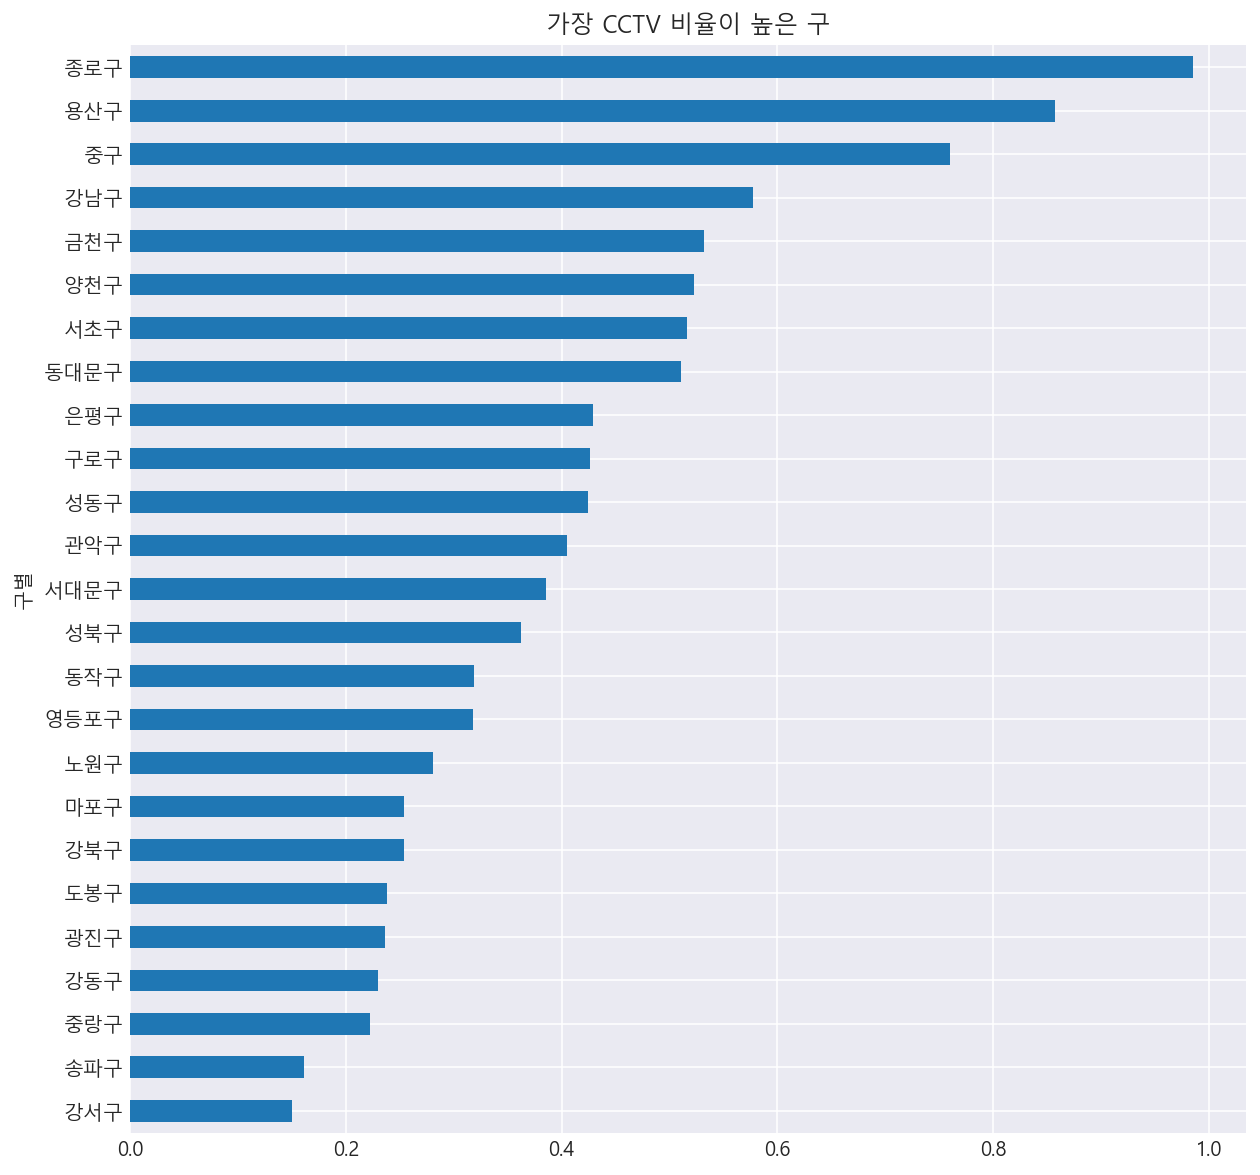

In [64]:
data_result["CCTV비율"].sort_values().plot(
    kind="barh",
    figsize=(10, 10),
    title = "가장 CCTV 비율이 높은 구"
);

# 데이터의 경향 표시

In [65]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.229358
강북구,831,125.203252,328002,324479,3523,56530,0.253352
강서구,911,134.793814,608255,601691,6564,76032,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

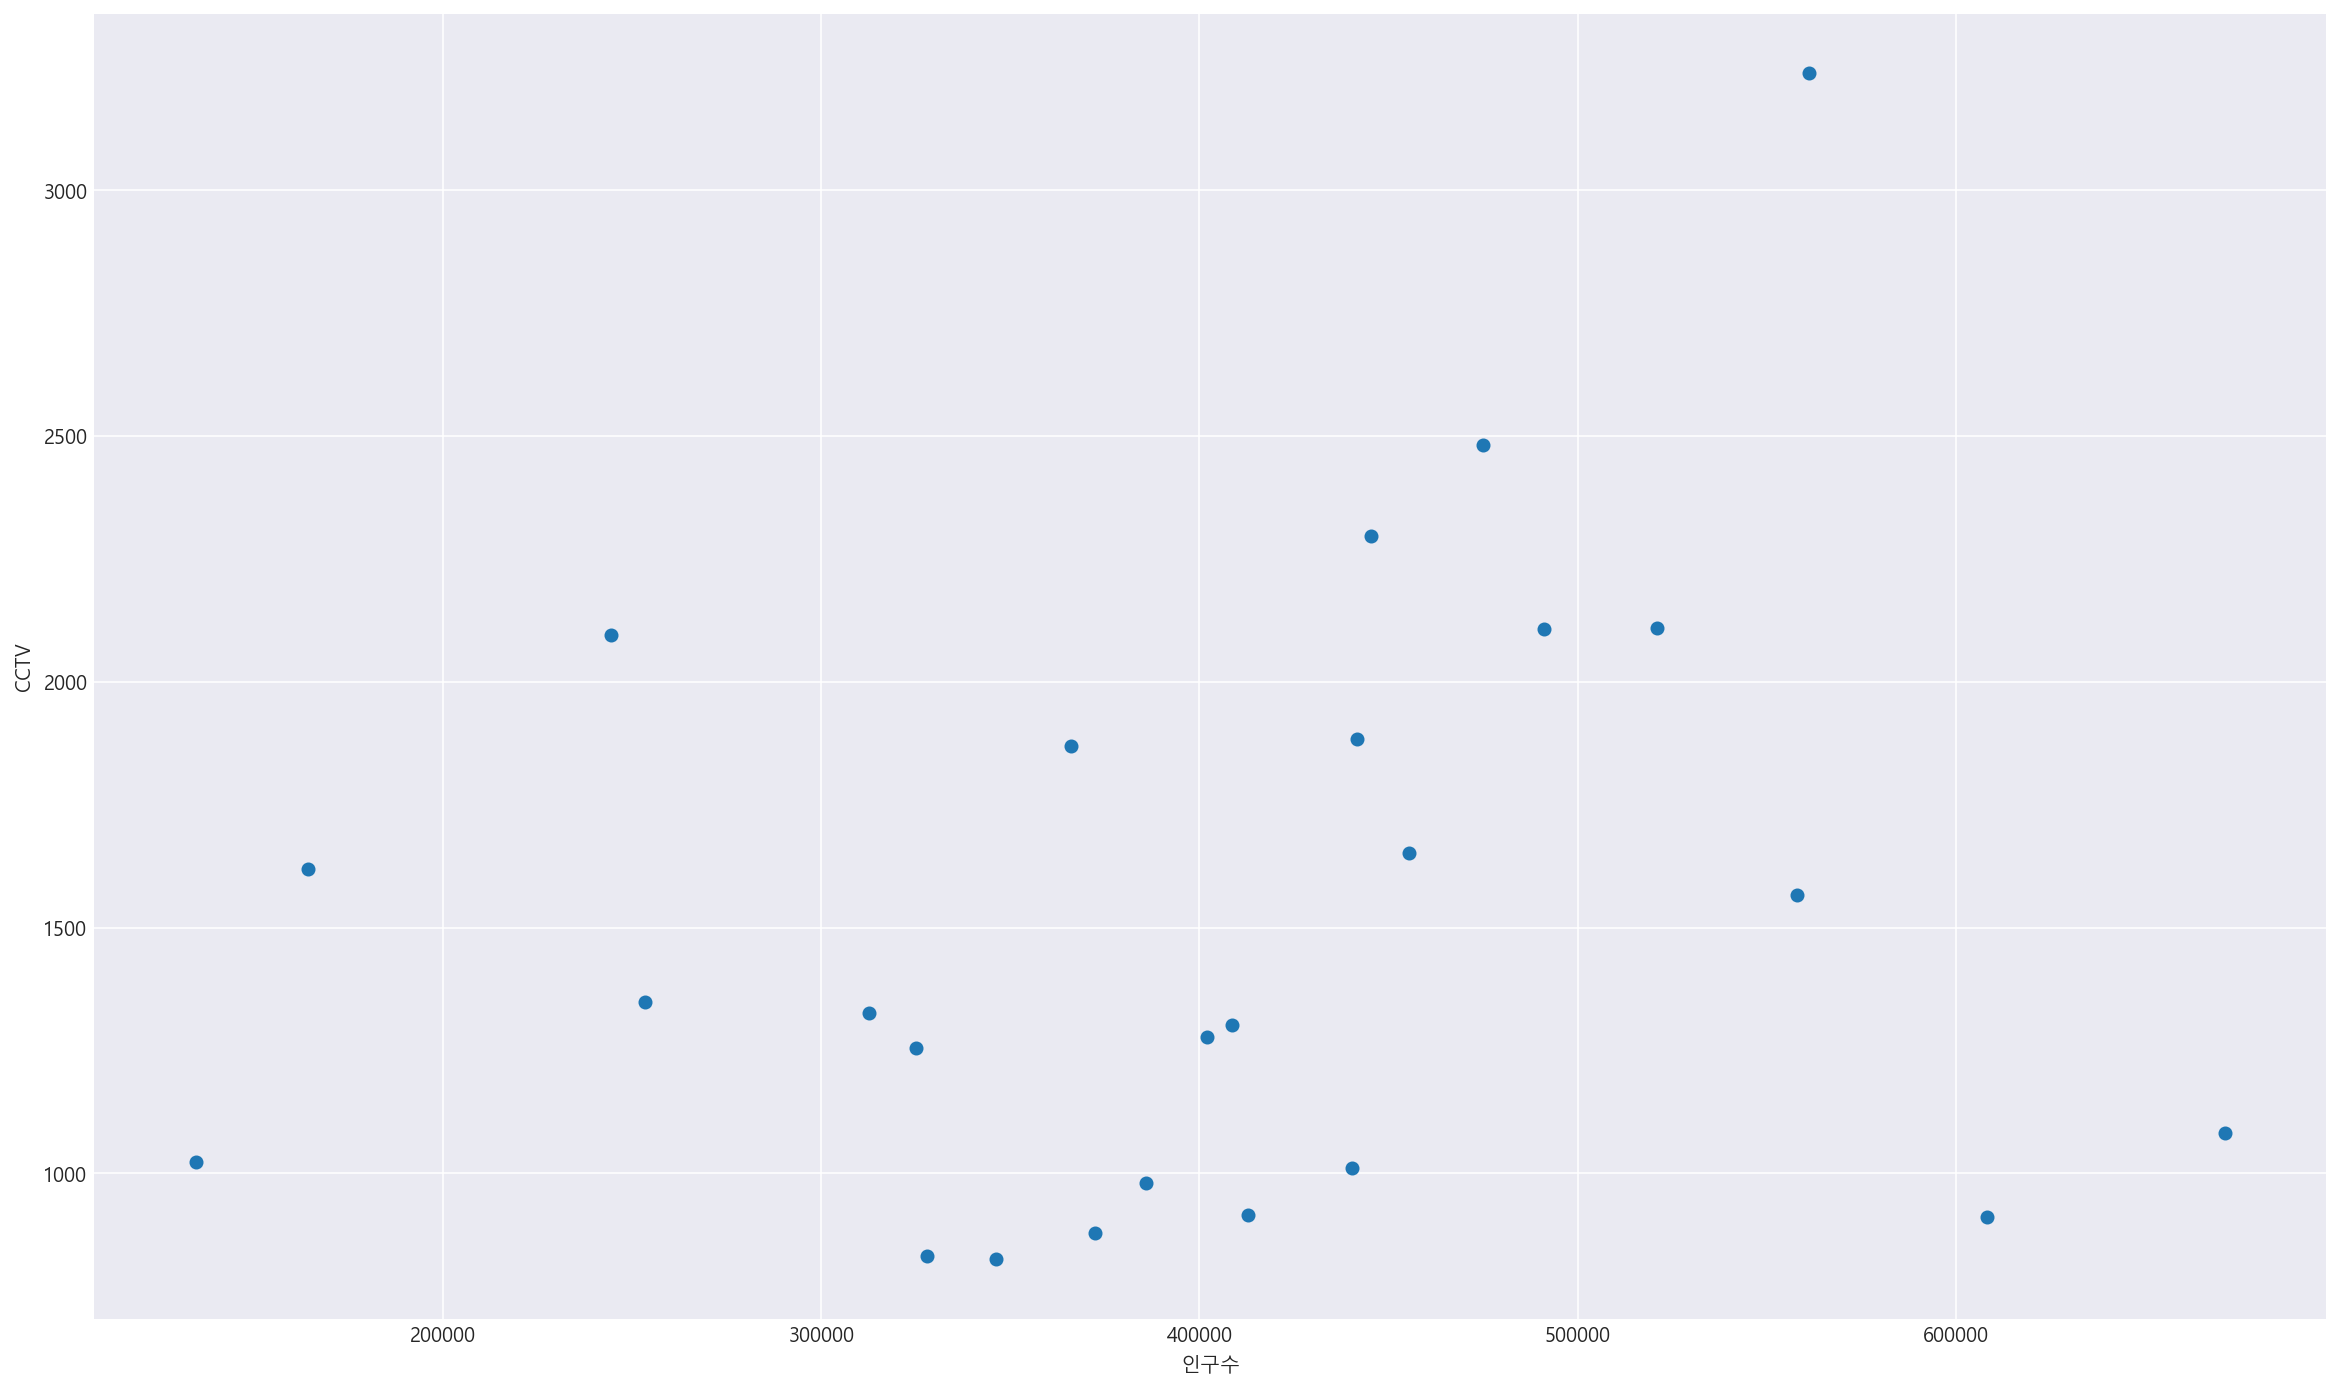

In [66]:
def drawGraph():
    plt.figure(figsize=(20,12))
    plt.scatter(
        data_result["인구수"],
        data_result["소계"],
    )
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.show();
drawGraph()

### Numpy를 이용한 1차 직선 만들기
- np.polyfit() : 다항함수 계수 계산
- np.poly1d(): 계수로 1차원 함수를 만들어 주는 기능

In [69]:
fpl = np.polyfit(data_result["인구수"], data_result["소계"],1)
fl = np.poly1d(fpl)

In [70]:
fl(500000)

1620.936793378529

In [71]:
fx = np.linspace(100000, 700000, 100)

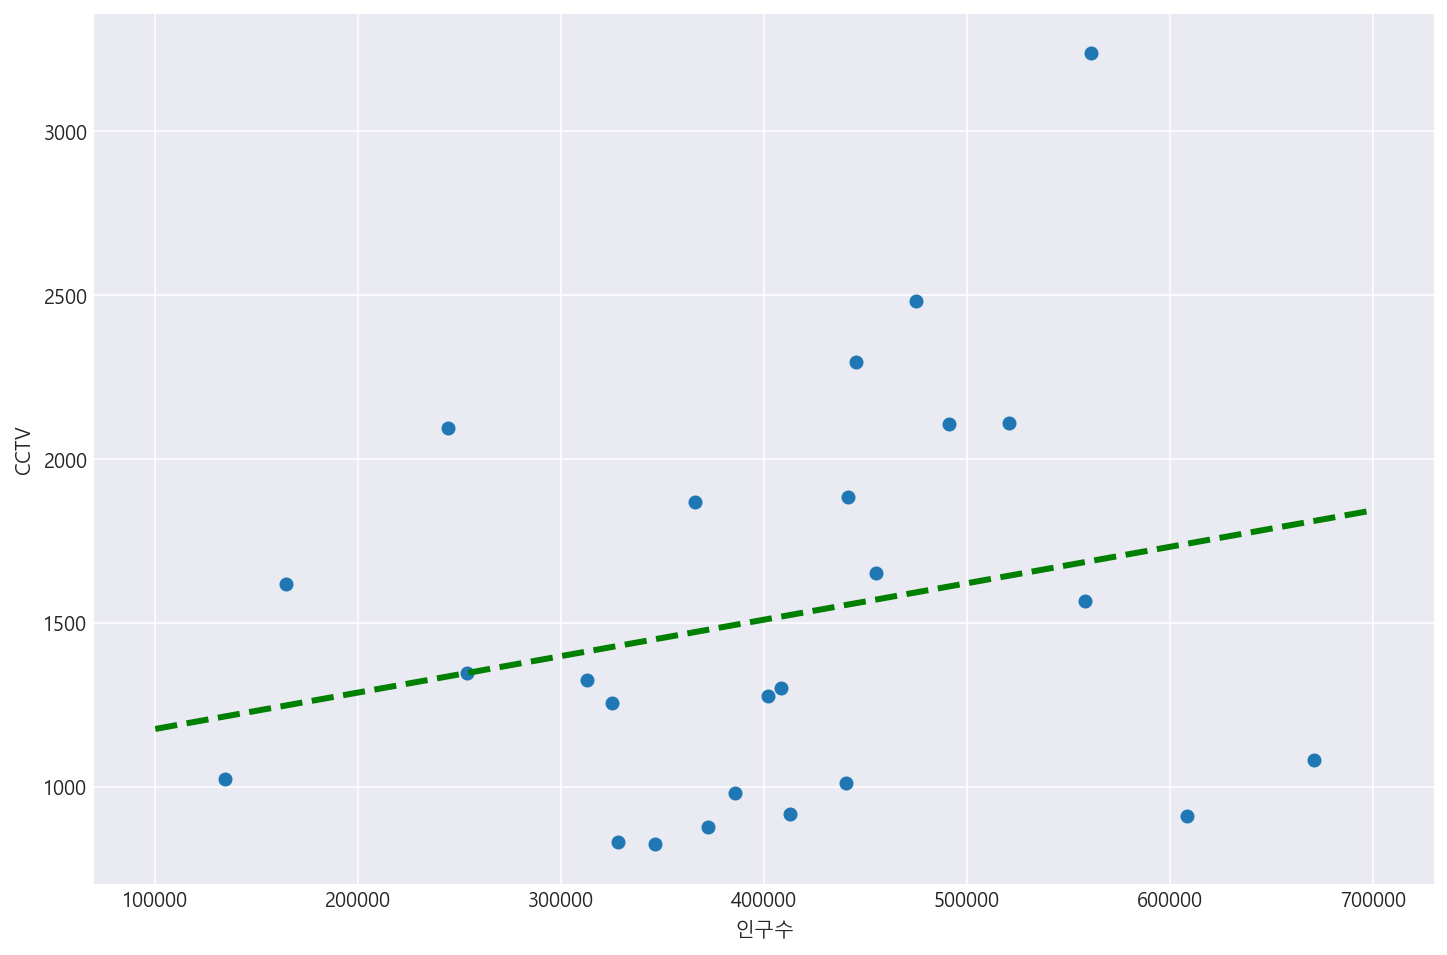

In [73]:
def drawGraph():
    plt.figure(figsize=(12,8))
    plt.scatter(
        data_result["인구수"],
        data_result["소계"],
    )
    plt.plot(
        fx,
        fl(fx),
        ls = "--",
        lw = 3,
        color = 'g'
        
    )
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.show();
drawGraph()

---

# 강조하고 싶은 데이터를 시각화 해보자

## 그래프 다듬기
### 경향과의 오차 만들기
- trend와의 오차를 만들자
- 경향은 fl 함수에 해당 인구수를 입력

In [79]:
fpl = np.polyfit(data_result["인구수"], data_result["소계"],1)
fl = np.poly1d(fpl)
fx = np.linspace(100000, 700000, 100)
data_result["오차"] = data_result["소계"] - fl(data_result["인구수"])

In [81]:
df_sort_f = data_result.sort_values(by="오차", ascending=False)

In [ ]:
import matplotlib as mpl
cmap = plt.cm.rainbow

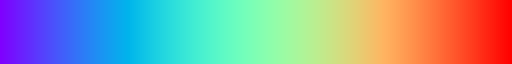

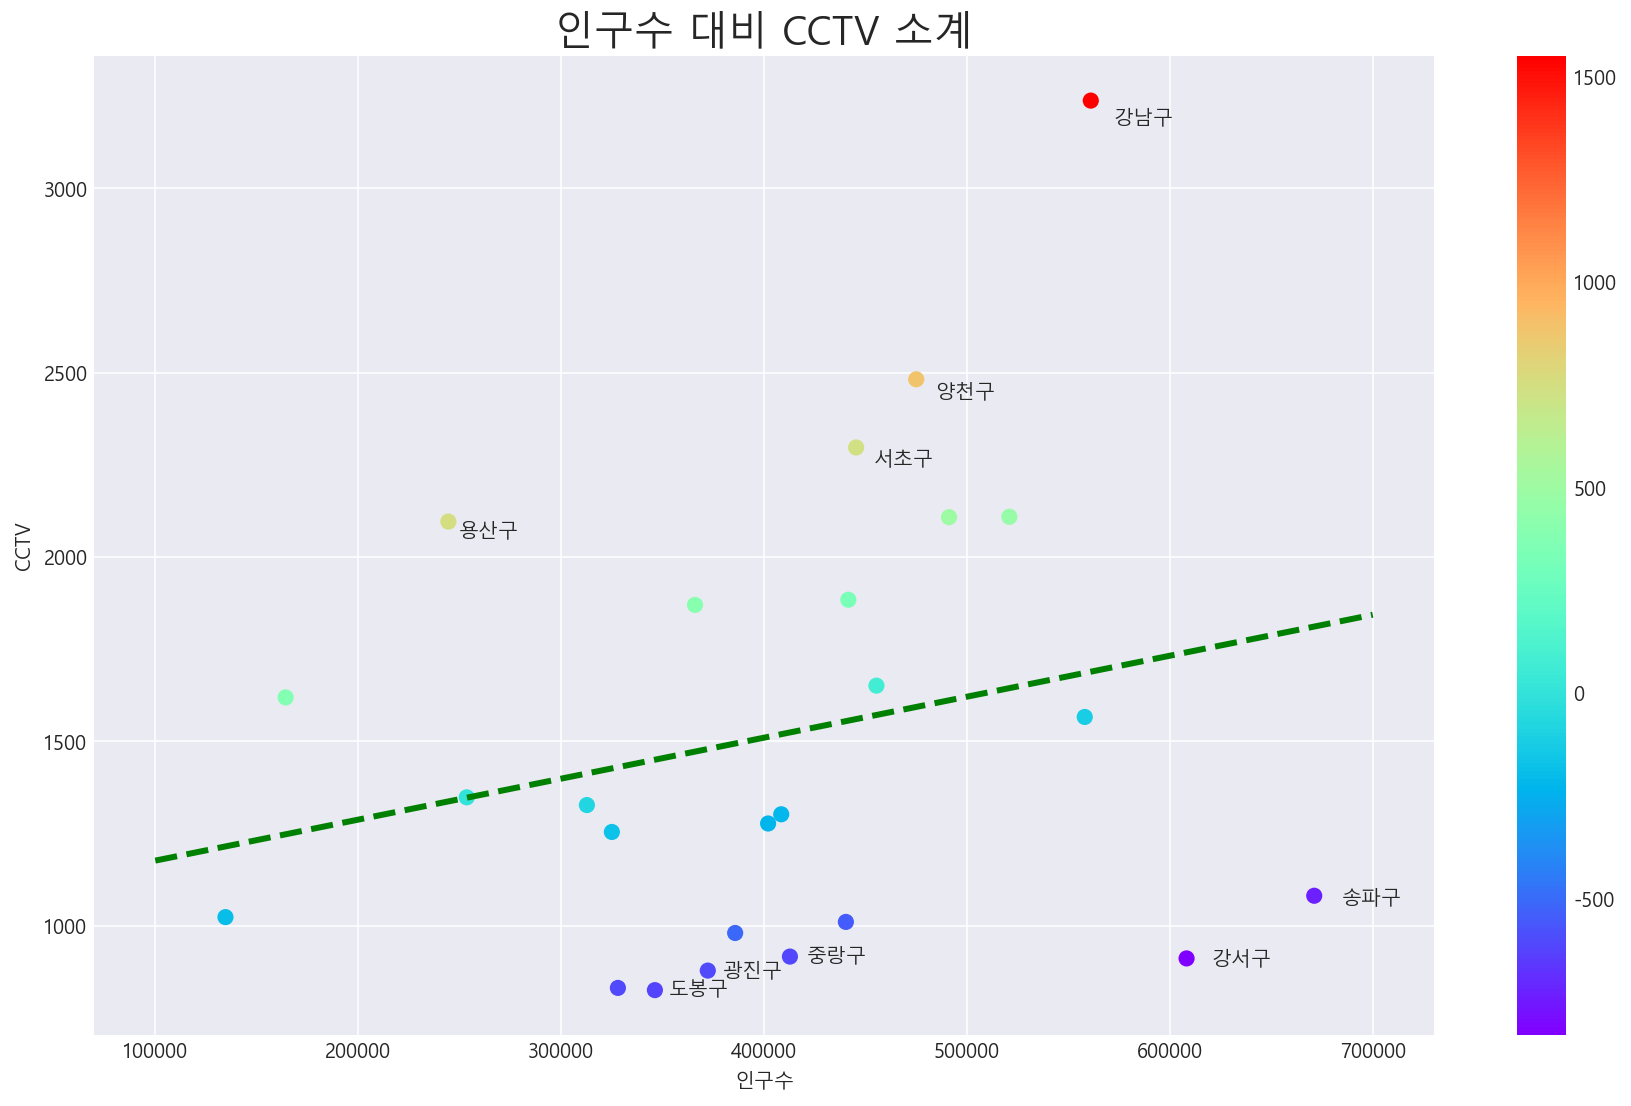

In [98]:
def drawGraph():
    plt.figure(figsize=(15,9))
    plt.scatter(data_result["인구수"], data_result["소계"],  s = 50,  c =data_result["오차"],  cmap = plt.cm.rainbow)
    plt.plot( fx,  fl(fx),  ls = "--",  lw = 3,  color = 'g')
    
    for n in range(4):
        plt.text(df_sort_f["인구수"][n] * 1.02, df_sort_f["소계"][n] * 0.98, df_sort_f.index[n], fontsize = 10)
    for n in range(1,6):
        plt.text(df_sort_f["인구수"][-n] * 1.02, df_sort_f["소계"][-n] * 0.98, df_sort_f.index[-n], fontsize = 10) 
           
    plt.title("인구수 대비 CCTV 소계", fontsize=20)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.show();
drawGraph()

In [100]:
data_result.to_csv("../data/01. CCTV_result.csv.", encoding="utf-8")